In [1]:
import pandas as pd

In [2]:
publications = pd.read_csv("final_matched_articles_with_gender.csv", encoding='utf-8-sig', low_memory=False)
academics = pd.read_excel("all_universities_academics_with_gender.xlsx")

In [3]:
publications['authors_list'] = publications['Author Full Names'].apply(lambda x: x.split('; '))

In [4]:
academics["Formal Name"] = academics["Academic Name"].apply(lambda x: str(x.split(" ")[1] + ", " + x.split(" ")[0]))

In [5]:
academics['Department'] = academics['Details'].apply(lambda x: x.split('/')[1])
academic_to_department = academics.set_index("Formal Name")['Department'].to_dict()

In [6]:
# Add a department column to publications dataset
def find_departments(authors_list):
    departments = set()
    for author in authors_list:
        if author in academic_to_department:
            departments.add(academic_to_department[author])
    return list(departments)

publications['Departments'] = publications['authors_list'].apply(find_departments)

In [7]:
department_papers = publications.explode('Departments')
papers_per_department = department_papers['Departments'].value_counts()

In [8]:
papers_per_department = papers_per_department.drop(labels = [idx for idx in papers_per_department.index if "FAKÜLTE" not in idx])
papers_per_department = pd.DataFrame(papers_per_department)

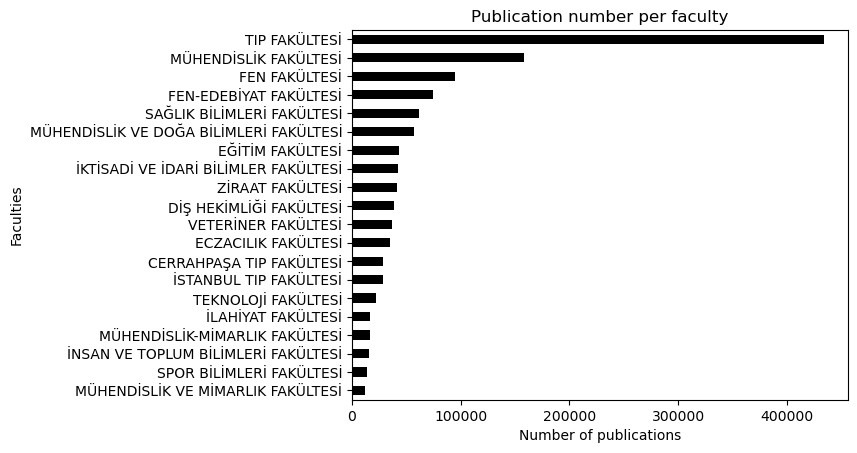

In [9]:
from matplotlib import pyplot as plt

df = pd.DataFrame(papers_per_department.head(20))
df.plot(legend=False, kind="barh", color= "Black").invert_yaxis()
plt.title("Publication number per faculty")
plt.ylabel("Faculties")
plt.xlabel("Number of publications")
plt.savefig("publication_per_faculty.jpg", bbox_inches="tight")

In [10]:
female_academics = academics[academics["Gender"]=='Female']
academic_to_department = female_academics.set_index("Formal Name")['Department'].to_dict()
publications['Departments'] = publications['authors_list'].apply(find_departments)

In [11]:
department_papers = publications.explode('Departments')
female_papers_per_department = department_papers['Departments'].value_counts()

In [12]:
female_papers_per_department = female_papers_per_department.drop(labels = [idx for idx in female_papers_per_department.index if "FAKÜLTE" not in idx])
female_papers_per_department = pd.DataFrame(female_papers_per_department)

In [13]:
female_papers_per_department = female_papers_per_department.head(20)

In [14]:
female_df = pd.merge(papers_per_department, female_papers_per_department, on="Departments", suffixes=("_all","_female"))

In [15]:
female_df["Female Ratio"] = female_df["count_female"] / female_df["count_all"]

In [16]:
female_df = female_df.sort_values(by="Female Ratio", ascending=False)

In [17]:
female_df = female_df.drop(columns=["count_all", "count_female"])

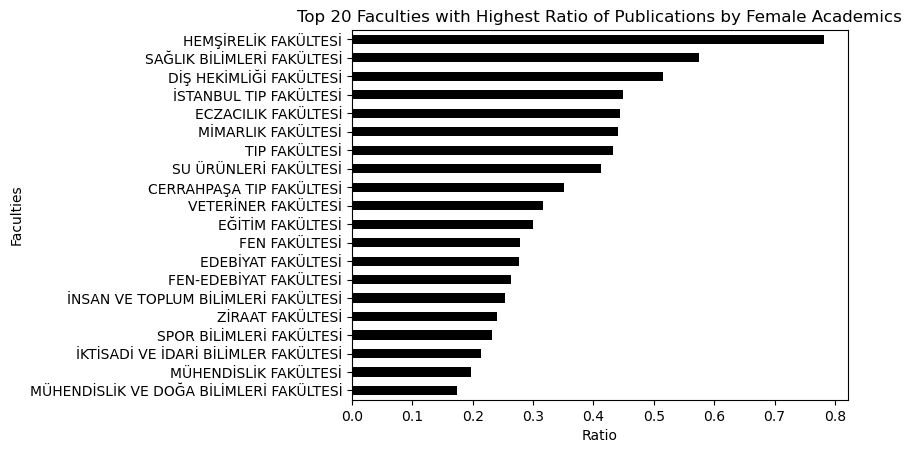

In [18]:
import matplotlib.ticker as mtick

female_df.plot(legend=False, kind="barh", color= "Black").invert_yaxis()
plt.title("Top 20 Faculties with Highest Ratio of Publications by Female Academics")
plt.ylabel("Faculties")
plt.xlabel("Ratio")
plt.savefig("female_ratio_per_faculty.jpg", bbox_inches="tight")